<!-- dom:TITLE: Data Analysis and Machine Learning: Linear Regression and more Advanced Regression Analysis -->
# Data Analysis and Machine Learning: Linear Regression and more Advanced Regression Analysis
<!-- dom:AUTHOR: Adriana Simancas de Filippo, Aliaa Afify, Julgen Pellumaj>
<!-- Author: -->  
**Adriana Simancas de Filippo, Aliaa Afify, Julgen Pellumaj**

Date: **Feb 20, 2020**

# <center>Project 1</center>

# Part A 

In this first part of the project we will study the 1 dimensional (1D) case of the Ising model which is a mathematical model used to study and identify the phase transitions of a system  that consists of discrete variables that represent magnetic dipole moments of atomic "spins" that can be in one of two states (+1 or −1).  In the 1D case we can consider the system as a string in which the $N$-spins are “placed” with the condition that $s_{N} = s_{N+1}$. We can just imagine the string as ring and the spins placed on it pointing up or down. This system we will call it Ising state. 

The energy of an Ising state is given by the formula below:

$$
\begin{equation}
    H = -J \sum_{<sk>}^N s_k s_{k + 1},
\end{equation}
$$

Where $s_{k} = ±1$ and $s_{l} = ±1$ are the spins of two neighbours, $N$ is the total number of spins, $J$ is a coupling constant expressing the strength of the interaction between neighboring spins. $< kl >$ indicates that we sum over nearest neighbors only.

We are going to use a data set which contain the spin configuration of a given ising state and its corresponding energy which have been generated by assuming at first $J=1$. By using only the data set which contain the spins and the energies we are going to perform a linear fit and check the value of $J$.
After we will generate the data which consist in a set of spins and energies, from which after performing a fit by using the linear regression method.


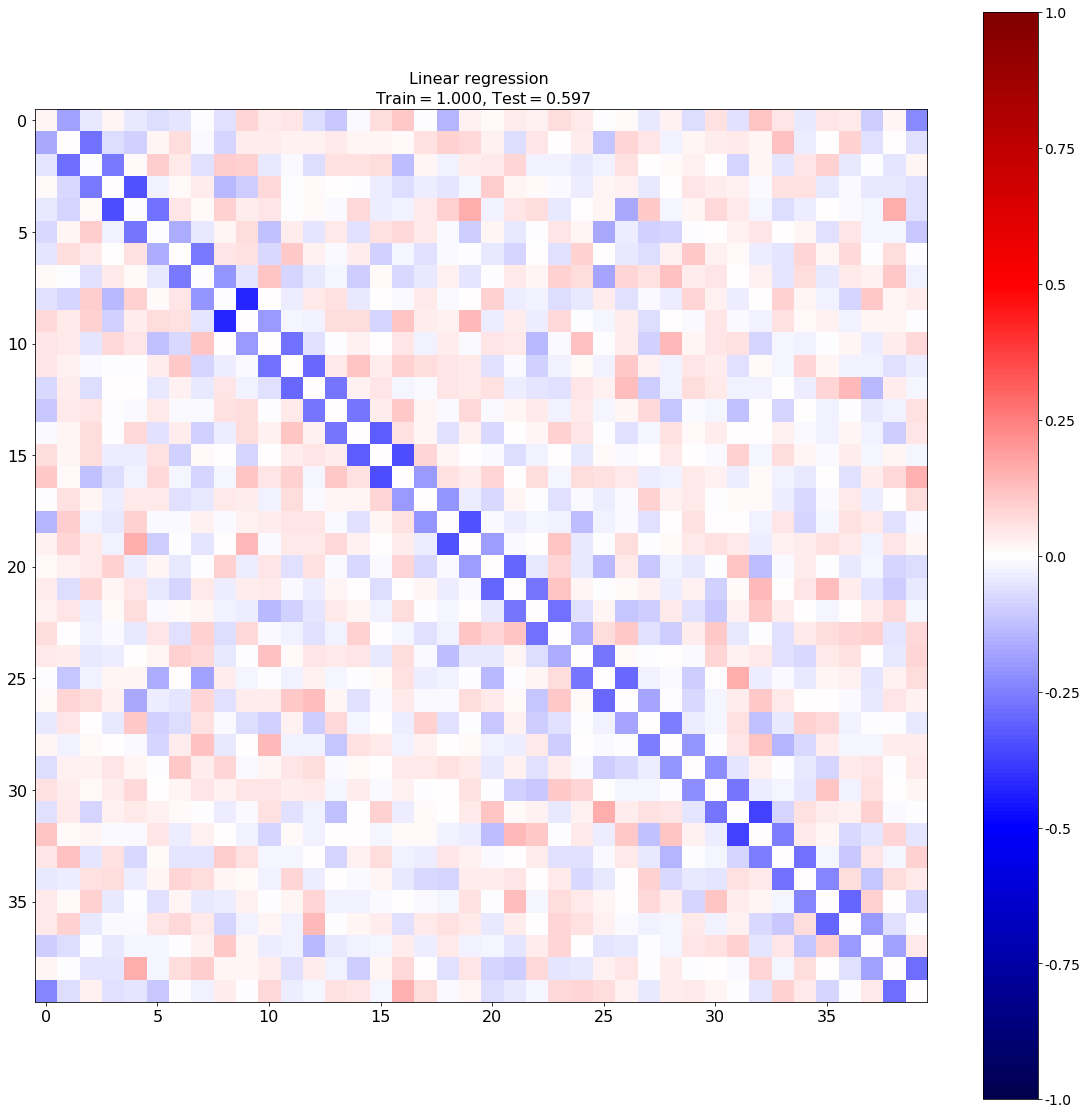

In [25]:
#importing different packages
import numpy as np
import scipy.sparse as sp
np.random.seed(12)

import warnings
warnings.filterwarnings('ignore')

# Here we define the parameters of the Ising model
# system size
L=40  # the number of spins of an Ising state

# creating 10000 random Ising states
states=np.random.choice([-1, 1], size=(10000,L))

# we define a function to calculate the energies which correspond to different Ising states 
# we assume J=1 in order to get the data for the energy
def ising_energies(states):
    """
    This function calculates the energies of the states in the nn Ising Hamiltonian
    """
    L = states.shape[1]
    J = np.zeros((L, L),)
    for i in range(L): 
        J[i,(i+1)%L]=-1.0 # interaction between nearest-neighbors is assumed to be 1
        
    # compute energies
    E = np.einsum('...i,ij,...j->...',states,J,states)

    return E
# calculate Ising energies
energies=ising_energies(states)
####################################################

# now we organize the data set composed from the spin configurations of the Ising states and the energy
# reshape Ising states into RL samples: S_iS_j --> X_p
states=np.einsum('...i,...j->...ij', states, states)
shape=states.shape
states=states.reshape((shape[0],shape[1]*shape[2]))
# build final data set
Data=[states,energies]
####################################################

# we split the data into training and test data
# define number of samples
n_samples=400
# define train and test data sets
X_train=Data[0][:n_samples]
Y_train=Data[1][:n_samples] #+ np.random.normal(0,4.0,size=X_train.shape[0])
X_test=Data[0][n_samples:3*n_samples//2]
Y_test=Data[1][n_samples:3*n_samples//2] #+ np.random.normal(0,4.0,size=X_test.shape[0])
#####################################################

#importing packages
from sklearn import linear_model
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn
%matplotlib inline

# set up the linear regression model
linreg=linear_model.LinearRegression()

# define error lists for the training and test data
train_errors_linreg = []
test_errors_linreg = []

#Initialize coeffficient
coefs_linreg = []
    
# ordinary least squares
linreg.fit(X_train, Y_train) # fit model 
coefs_linreg.append(linreg.coef_) # store weights
# use the coefficient of determination R^2 as the performance of prediction.
train_errors_linreg.append(leastsq.score(X_train, Y_train))
test_errors_linreg.append(leastsq.score(X_test,Y_test))
    
# now we plot the results obtained from the fit
# plot Ising interaction J
J_linreg=np.array(linreg.coef_).reshape((L,L))

cmap_args=dict(vmin=-1., vmax=1., cmap='seismic')

fig = plt.figure(figsize=(20, 20))
im = plt.imshow(J_linreg, **cmap_args)

cmap_args=dict(vmin=-1., vmax=1., cmap='seismic')
    
plt.imshow(J_linreg,**cmap_args)
plt.title('Linear regression \n Train$=%.3f$, Test$=%.3f$'%(train_errors_linreg[-1], test_errors_linreg[-1]),fontsize=16)
plt.tick_params(labelsize=16)
    
cbar=fig.colorbar(im)
    
cbar.ax.set_yticklabels(np.arange(-1.0, 1.0+0.25, 0.25),fontsize=14)
    
plt.show()

# Part B

In this part of the project we are going to fitt the same data set we had in $Part A$ by using linear regression, Ridge and Lasso methods. Each of the fitting methods will give a value of the coupling constant $J$ for the training and test data and the correspondig erros. By comparing these results we are going to conclude for the best fitting method in this case. The best method is going to be the one which gives a value of $J$ close to the real one. Ridge and Lasso method calculations have been done for different values of ${\lambda}$.

In [1]:
#importing packages
from sklearn import linear_model
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn
%matplotlib inline

# set up linear, Lasso and Ridge Regression methods
leastsq=linear_model.LinearRegression()
ridge=linear_model.Ridge()
lasso = linear_model.Lasso()

# define error lists
train_errors_leastsq = []
test_errors_leastsq = []

train_errors_ridge = []
test_errors_ridge = []

train_errors_lasso = []
test_errors_lasso = []

# set regularisation strength values
lmbdas = np.logspace(-4, 5, 10)

#Initialize coeffficients for ridge regression and Lasso
coefs_leastsq = []
coefs_ridge = []
coefs_lasso=[]

for lmbda in lmbdas:
    
    # ordinary least squares
    leastsq.fit(X_train, Y_train) # fit model 
    coefs_leastsq.append(leastsq.coef_) # store weights
    # use the coefficient of determination R^2 as the performance of prediction.
    train_errors_leastsq.append(leastsq.score(X_train, Y_train))
    test_errors_leastsq.append(leastsq.score(X_test,Y_test))
    
    # apply RIDGE regression
    ridge.set_params(alpha=lmbda) # set regularisation parameter
    ridge.fit(X_train, Y_train) # fit model 
    coefs_ridge.append(ridge.coef_) # store weights
    # use the coefficient of determination R^2 as the performance of prediction.
    train_errors_ridge.append(ridge.score(X_train, Y_train))
    test_errors_ridge.append(ridge.score(X_test,Y_test))
    
    # apply LASSO regression
    lasso.set_params(alpha=lmbda) # set regularisation parameter
    lasso.fit(X_train, Y_train) # fit model
    coefs_lasso.append(lasso.coef_) # store weights
    # use the coefficient of determination R^2 as the performance of prediction.
    train_errors_lasso.append(lasso.score(X_train, Y_train))
    test_errors_lasso.append(lasso.score(X_test,Y_test))

    # plot Ising interaction J
    J_leastsq=np.array(leastsq.coef_).reshape((L,L))
    J_ridge=np.array(ridge.coef_).reshape((L,L))
    J_lasso=np.array(lasso.coef_).reshape((L,L))

    cmap_args=dict(vmin=-1., vmax=1., cmap='seismic')

    fig, axarr = plt.subplots(nrows=1, ncols=3)
    
    axarr[0].imshow(J_leastsq,**cmap_args)
    axarr[0].set_title('OLS \n Train$=%.3f$, Test$=%.3f$'%(train_errors_leastsq[-1], test_errors_leastsq[-1]),fontsize=16)
    axarr[0].tick_params(labelsize=16)
    
    axarr[1].imshow(J_ridge,**cmap_args)
    axarr[1].set_title('Ridge $\lambda=%.4f$\n Train$=%.3f$, Test$=%.3f$' %(lmbda,train_errors_ridge[-1],test_errors_ridge[-1]),fontsize=16)
    axarr[1].tick_params(labelsize=16)
    
    im=axarr[2].imshow(J_lasso,**cmap_args)
    axarr[2].set_title('LASSO $\lambda=%.4f$\n Train$=%.3f$, Test$=%.3f$' %(lmbda,train_errors_lasso[-1],test_errors_lasso[-1]),fontsize=16)
    axarr[2].tick_params(labelsize=16)
    
    divider = make_axes_locatable(axarr[2])
    cax = divider.append_axes("right", size="5%", pad=0.05, add_to_figure=True)
    cbar=fig.colorbar(im, cax=cax)
    
    cbar.ax.set_yticklabels(np.arange(-1.0, 1.0+0.25, 0.25),fontsize=14)
    cbar.set_label('$J_{i,j}$',labelpad=15, y=0.5,fontsize=20,rotation=0)
    
    fig.subplots_adjust(right=2.0)
    
    plt.show()

ModuleNotFoundError: No module named 'seaborn'

Now we can compare the performance of all the fitting methods by plotting all their results together

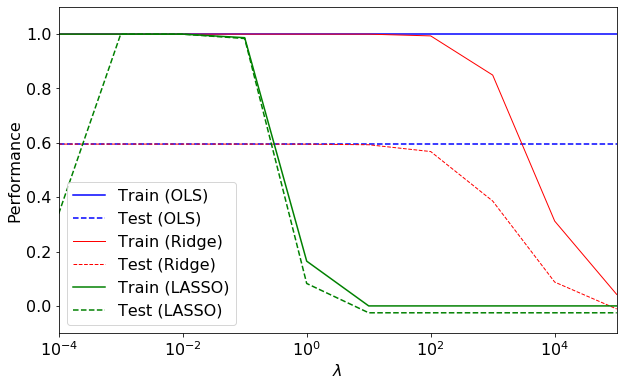

In [27]:
# Plot our performance on both the training and test data
plt.semilogx(lmbdas, train_errors_leastsq, 'b',label='Train (OLS)')
plt.semilogx(lmbdas, test_errors_leastsq,'--b',label='Test (OLS)')
plt.semilogx(lmbdas, train_errors_ridge,'r',label='Train (Ridge)',linewidth=1)
plt.semilogx(lmbdas, test_errors_ridge,'--r',label='Test (Ridge)',linewidth=1)
plt.semilogx(lmbdas, train_errors_lasso, 'g',label='Train (LASSO)')
plt.semilogx(lmbdas, test_errors_lasso, '--g',label='Test (LASSO)')

fig = plt.gcf()
fig.set_size_inches(10.0, 6.0)

#plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
#           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left',fontsize=16)
plt.ylim([-0.1, 1.1])
plt.xlim([min(lmbdas), max(lmbdas)])
plt.xlabel(r'$\lambda$',fontsize=16)
plt.ylabel('Performance',fontsize=16)
plt.tick_params(labelsize=16)
plt.show()

Conclusion: 
We can see from the plot above that Lasso method gives a very good result for both the training and the test data. This method for the values of lambda, $10^{-3}\leq{\lambda}\leq10^{-1}$ it gives values of $J$ which are very close to $1$.

The two other methods doesn't give such good results. Ordinary least square method gives $J=0.597$ for the test data which is far from what we expect for the value of $J$.
Ridge method also it gives values close to 0.6, and even smaller for values of ${\lambda}$ bigger than $10^{2}$.

Lasso method is the best in our case.